# Test of running the code for several dates

*JASaa*

*PIE017 ISAE-SUPAERO*

## Load data and import functions

In [26]:
from eddies import load_netcdf4,eddy_detection,print_eddies,plot_eddies

#name of the netCDF data file
filename = 'Lebreton_2015.nc'

# load data
(f,lon,lat,depth,uvel,vvel,t) =  load_netcdf4(filename)

# Confidence level, usually 90%
R2_criterion = 0.9
# OW value at which to begin the evaluation of R2
OW_start = -1.0
# Number of local minima to evaluate using R2 method.
# Set low (like 20) to see a few R2 eddies quickly.
# Set high (like 1e5) to find all eddies in domain.
max_evaluation_points = 20 #set to 2000 to capture avery minima, there should be around 1800
# Minimum number of cells required to be identified as an eddie.
min_eddie_cells = 3 # set to 3 to be coherent with the use of the R2 method, 3 points seems like a reasonable minimun for a correlation 
# z-level to plot.  Usually set to 0 for the surface.
k_plot = 0

## Run code for several days
Run this cell to generate data for every day
- **eddy_data** is a list of len(t) (or 92 elements for the Lebreton2015 data) tuples 
    *(lon,lat,uvel,vvel,vorticity,OW,OW_eddies,eddie_census,nEddies,circulation_mask)* 
- *lon,lat,uvel,vvel* are not in the same format as the original netcdf data, they are transposed and only for one day
- *circulation_mask* has the circulation for each cell such that circulation_mask = circ(lon,lat). The circulation is constant in an eddy and 0 outside of any eddy
    - circ>0 : cyclonic eddy
    - circ<0 : anti-cyclonic eddy
    - circ=0 :  no eddy
    
To know more about each output, refer to the comments at the top of **eddies.py**

In [27]:
%%capture

eddy_data = []
for day in range(len(t)):
    eddy_data.append(eddy_detection(lon,lat,depth,uvel,vvel,day,R2_criterion,OW_start,max_evaluation_points,min_eddie_cells)) 
    #list: lon,lat,uvel,vvel,vorticity,OW,OW_eddies,eddie_census,nEddies,circulation_mask

### Example : to acces the circulation mask for each day and store it in a list

In [40]:
import numpy as np

nEd = np.zeros(len(t),dtype=int)
n_cyclonic = np.zeros(len(t),dtype=int)
eddy_census_list = []
mask_circulation_list = []
for day in range(len(t)):
    nEd[day] = eddy_data[day][8] #count the number of eddies for each day with circ>0 for each day
    eddy_census_list.append(eddy_data[day][7]) #store all eddy_census in a list
    n_cyclonic[day] = sum(circ > 0. for circ in eddy_census_list[day][1]) #count the number of eddies with circ>0 for each day
    mask_circulation_list.append(eddy_data[day][9]) #list of circulation masks

In [41]:
print_eddies(eddy_census_list[0],nEd[0])


Eddie census data

       minOW  circ(m^2/s)      lon(º)     lat(º)  cells  diameter(km)
1  -1.018026  1967.118489 -146.166672  35.583332    4.0     21.112064
2  -1.565762  4898.388022 -142.000000  35.416668  271.0    156.668046
3  -1.095013 -2132.443575 -143.666672  41.333332   38.0     56.752173
4  -1.758855  2606.605709 -146.916672  41.333332   45.0     61.641662
5  -1.106141 -2232.649035 -146.666672  39.666668   38.0     57.172476
6  -1.835665 -3078.219284 -151.250000  29.583334   48.0     68.282917
7  -2.486086 -3740.353974 -137.666672  37.916668   54.0     69.059139
8  -2.646354  3652.371800 -132.500000  37.333332   57.0     71.149317
9  -1.041717 -2699.189087 -150.500000  31.916666   17.0     40.893884
10 -1.880907  3064.873219 -141.166672  26.583334   55.0     74.016570
11 -2.303506 -4075.053010 -153.000000  25.583334   25.0     50.702113
12 -2.118092 -4775.541925 -136.583328  39.166668  211.0    134.369528
13 -1.869388 -2861.738125 -156.416672  33.833332   30.0     53.156078


## Example of some interesting post-processing
Similar plot to the Petersen2013 paper

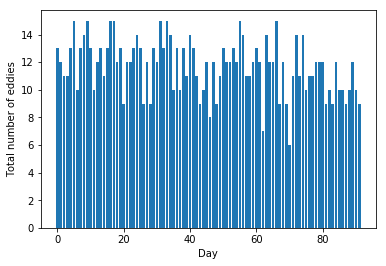

In [42]:
#number of eddies vs day
import matplotlib.pyplot as plt
import numpy as np

plt.bar(np.arange(len(t)),nEd)
plt.ylabel('Total number of eddies')
plt.xlabel('Day')
plt.show()

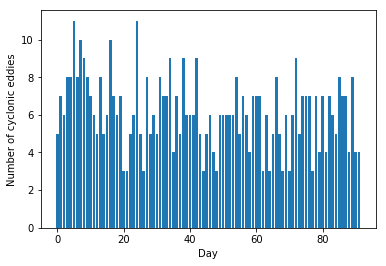

In [43]:
#number of cyclonic eddies vs day
import matplotlib.pyplot as plt
import numpy as np

plt.bar(np.arange(len(t)),n_cyclonic)
plt.ylabel('Number of cyclonic eddies')
plt.xlabel('Day')
plt.show()

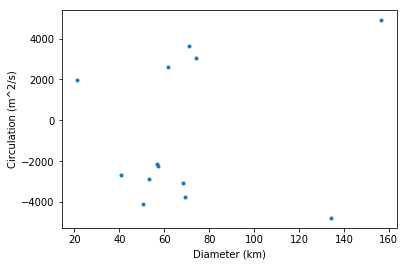

In [44]:
#plot of circulation vs diameter for a certain day
import matplotlib.pyplot as plt

day0 = 0 

plt.plot(eddy_census_list[day0][5,:nEd[day0]],eddy_census_list[day0][1,:nEd[day0]],'.')
plt.xlabel('Diameter (km)')
plt.ylabel('Circulation (m^2/s)')
plt.show()

### We put map_circulation in the same format as the original uvel, vvel, etc; that we took from the netcdf data.

In [63]:
# We turn the list into an ndarray like uvel, 
map_circulation = np.asarray(mask_circulation_list)
map_circulation.shape

(92, 385, 205, 1)

In [66]:
# The shape that we need
uvel.shape

(92, 1, 205, 385)

In [70]:
# Transpose to the new shape
map_circulation_final = map_circulation.transpose(0,3,2,1)
map_circulation_final.shape

(92, 1, 205, 385)

### We can also pretty print the dates
It might be useful...

In [69]:
import datetime

def julianh2gregorian(time_hours,origin):
    return origin + datetime.timedelta(hours=time_hours)

origin_julian = datetime.date(1950, 1, 1) 

gregorian_dates = []
gregorian_str = []
for i in range(len(t)):
    gregorian_dates.append(julianh2gregorian(t[i],origin_julian))
    gregorian_str.append(str(gregorian_dates[i]))

print(gregorian_str)

['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16', '2015-07-17', '2015-07-18', '2015-07-19', '2015-07-20', '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24', '2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28', '2015-07-29', '2015-07-30', '2015-07-31', '2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04', '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08', '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12', '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16', '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20', '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24', '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28', '2015-08-29', '2015-08-30', '2015-08-31', '2015-09-01', '2015-09-02', '2015-09-03', '2015-09-04', '2015-09-05', '2015-09-06', '2015-09-07', '2015-09-08', '2015-09-09', '2015